# **Library import**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.config.experimental import list_physical_devices, set_virtual_device_configuration, VirtualDeviceConfiguration

In [1]:
from tensorflow.config.experimental import list_physical_devices, set_virtual_device_configuration, VirtualDeviceConfiguration

gpus = list_physical_devices('GPU')
set_virtual_device_configuration(gpus[0], [VirtualDeviceConfiguration(memory_limit=1200)])
print(len(gpus), "Physical GPUs")

1 Physical GPUs


In [4]:
gpus = list_physical_devices('GPU')
set_virtual_device_configuration(gpus[0], [VirtualDeviceConfiguration(memory_limit=1200)])
print(len(gpus), "Physical GPUs")

1 Physical GPUs


## **Data**

(60000, 28, 28)

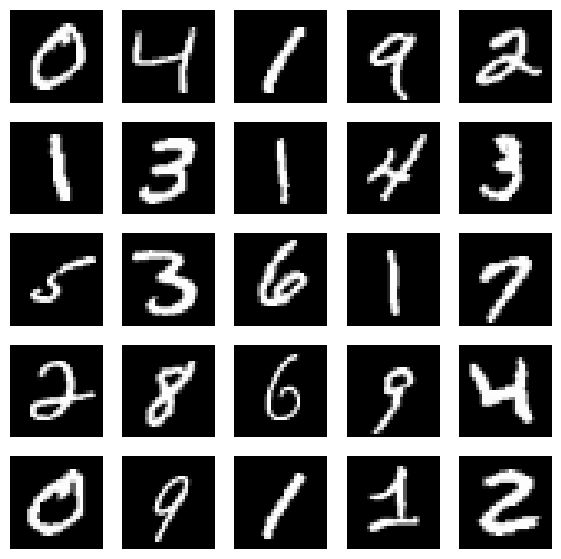

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(7,7))
x = 1
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,x)
        plt.imshow(X_train[x], cmap="gray");
        plt.axis("off")
        x += 1
        
X_train.shape

# **Network**

## **No activation**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


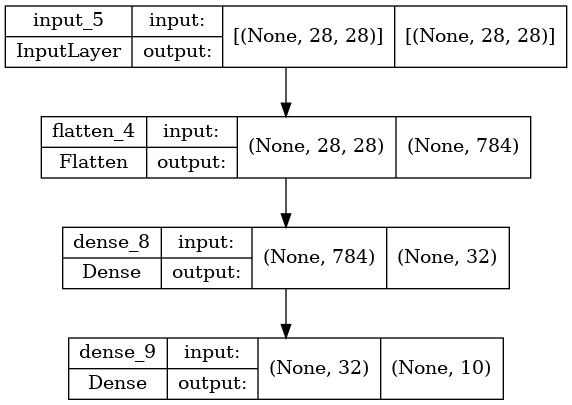

In [12]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [13]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4049 - accuracy: 0.8884 - val_loss: 0.2908 - val_accuracy: 0.9197
Epoch 2/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2905 - accuracy: 0.9186 - val_loss: 0.2816 - val_accuracy: 0.9219
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2769 - accuracy: 0.9223 - val_loss: 0.2700 - val_accuracy: 0.9260
Epoch 4/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2701 - accuracy: 0.9258 - val_loss: 0.2711 - val_accuracy: 0.9229
Epoch 5/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2664 - accuracy: 0.9258 - val_loss: 0.2773 - val_accuracy: 0.9243


## **Tanh activation**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


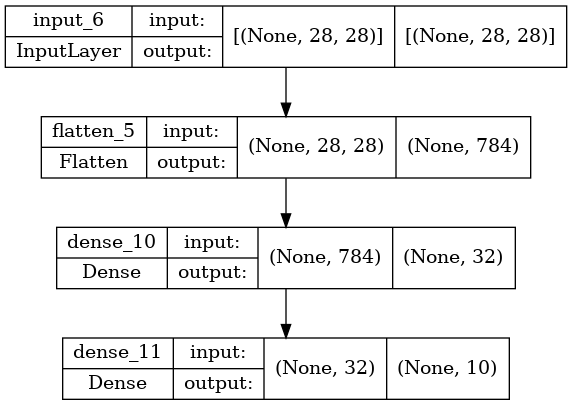

In [14]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [15]:
history_sigmoid = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.6567 - accuracy: 0.8528 - val_loss: 0.3218 - val_accuracy: 0.9177
Epoch 2/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2813 - accuracy: 0.9225 - val_loss: 0.2396 - val_accuracy: 0.9299
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2245 - accuracy: 0.9364 - val_loss: 0.2055 - val_accuracy: 0.9404
Epoch 4/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1931 - accuracy: 0.9458 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 5/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1715 - accuracy: 0.9510 - val_loss: 0.1689 - val_accuracy: 0.9518


## **ReLU activation**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


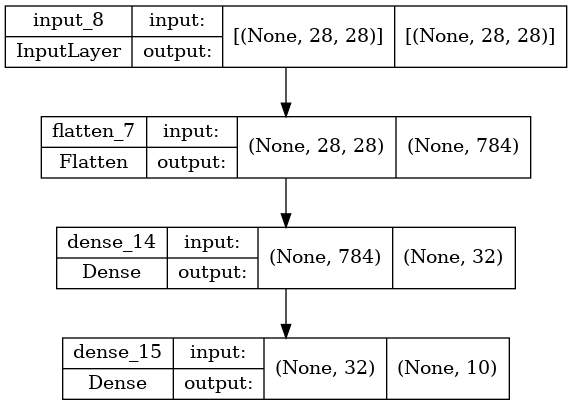

In [18]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='ReLU'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [19]:
history_relu = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3921 - accuracy: 0.8921 - val_loss: 0.2309 - val_accuracy: 0.9338
Epoch 2/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2075 - accuracy: 0.9401 - val_loss: 0.1817 - val_accuracy: 0.9450
Epoch 3/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1651 - accuracy: 0.9516 - val_loss: 0.1501 - val_accuracy: 0.9546
Epoch 4/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1393 - accuracy: 0.9586 - val_loss: 0.1392 - val_accuracy: 0.9581
Epoch 5/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1225 - accuracy: 0.9636 - val_loss: 0.1339 - val_accuracy: 0.9585


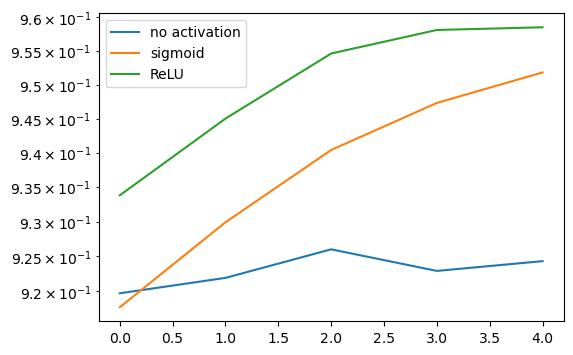

In [24]:
plt.figure(figsize=(6,4))

plt.plot(history.history['val_accuracy'], label="no activation")
plt.plot(history_sigmoid.history['val_accuracy'], label="sigmoid")
plt.plot(history_relu.history['val_accuracy'], label="ReLU")

plt.legend()
plt.yscale("log")